# OCR Testbed

## Sources:
1. https://github.com/wjbmattingly/ocr_python_textbook/blob/main/02_02_working%20with%20opencv.ipynb
2. Video: https://www.youtube.com/watch?v=ADV-AjAXHdc&ab_channel=PythonTutorialsforDigitalHumanities

Page segmentation modes:

| Number | Description |
| ----------- | ----------- |
|  0 |   Orientation and script detection (OSD) only. |
|  1  |  Automatic page segmentation with OSD.|
|  2  |  Automatic page segmentation, but no OSD, or OCR.|
|  3  |  Fully automatic page segmentation, but no OSD. (Default)|
|  4  |  Assume a single column of text of variable sizes.|
|  5  |  Assume a single uniform block of vertically aligned text.|
|  6  |  Assume a single uniform block of text.|
|  7  |  Treat the image as a single text line.|
|  8  |  Treat the image as a single word.|
|  9  |  Treat the image as a single word in a circle.|
| 10  |  Treat the image as a single character.|
| 11  |  Sparse text. Find as much text as possible in no particular order.|
| 12  |  Sparse text with OSD.|
| 13  |  Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.|

**OCR Engine Modes:**

0. Legacy engine only.
1. Neural nets LSTM engine only.
2. Legacy + LSTM engines.
3. Default, based on what is available.

In [7]:
import re
from matplotlib import pyplot as plt
import pytesseract
import cv2

In [8]:
# https://stackoverflow.com/questions/28816046/
# displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

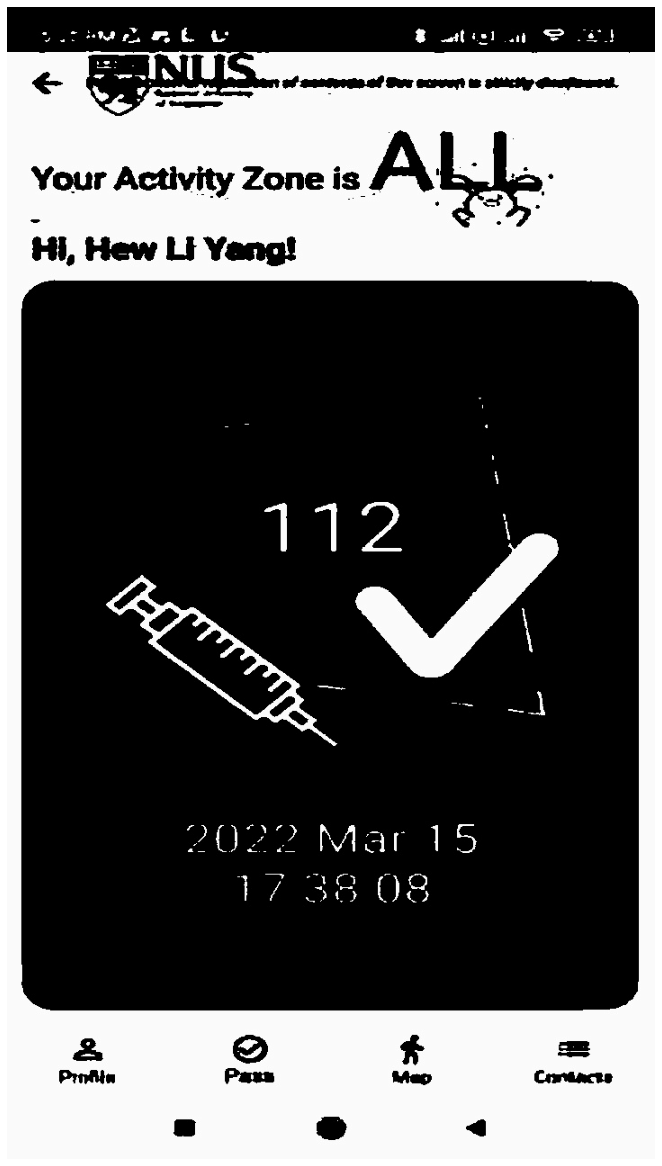

['2022 Mar 15']
[]


In [10]:
# Uses regex patterns to match time and date
def extract_time_date_data(text):
    date = re.findall(r'\d{4}\s\w{3,4}\s\d{1,2}', text) # Detect format of YYYY MMM DD
    time = re.findall(r'\d{2}:\d{2}:\d{2}', text) # Detect format of HH:MM:SS
    return (date, time)

# Extract text from single image, for testing purposes
def extract_from_single_image(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    cv2.imwrite('./temp/grayscale.jpg', grayscale_image)
    display('./temp/grayscale.jpg')

    thresh, im_bw = cv2.threshold(grayscale_image, 220, 250, cv2.THRESH_BINARY)
    cv2.imwrite("temp/bw_image.jpg", im_bw)
    # display("temp/bw_image.jpg")

    no_noise = noise_removal(im_bw)
    cv2.imwrite("temp/no_noise.jpg", no_noise)
    # display("temp/no_noise.jpg")

    no_borders = remove_borders(no_noise)
    cv2.imwrite("temp/no_borders.jpg", no_borders)
    # display("temp/no_borders.jpg")

    text = pytesseract.image_to_string(grayscale_image, config='--psm 11 --oem 3')
    date_time_info = extract_time_date_data(text)
    print(date_time_info[0])
    print(date_time_info[1])

extract_from_single_image('./ProcessedImages/GreenPass/9.jpg')